# 1. Human capital accumulation

## Question 1
First we will define each variable and parameters with Sympy.symbols.

In [1]:
# import packages
import numpy as np
import sympy as sm
sm.init_printing(use_unicode=True) # for pretty printing

In [2]:
# Define parameters and variables as symbols
rho = sm.symbols("rho")
beta = sm.symbols("beta")
gamma = sm.symbols("gamma")
w = sm.symbols("w")
b = sm.symbols("b")
Delta = sm.symbols("Delta")
h_2 = sm.symbols("h_2")
l_2 = sm.symbols("l_2")
c_2 = sm.symbols("c_2")
l_1 = sm.symbols("l_1")
h_1 = sm.symbols("h_1")

The utility the worker receives from consumption depends on the variable $l_t$. If the value is [1], consumption will be $w*h_2*l_2$, and for the value [0], $(1-l_2)*b$. Hence we define the function as the following:
$c_2 = (w*h_2*l_2)+(1-l_2)*b$

In [3]:
# Define consumption function according to the pres-ented formula
# Includes, wage w, unemployment benefit b, human capital for period 2 h_2 and labor supply for period 2 l_2
# Returns the consumption
def consumption_2(w, h_2, l_2, b):
    return (w*h_2*l_2)+(1-l_2)*b

Next we will try to define the utility function.

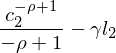

In [4]:
# Define utility function according to the presented formula
utility = c_2 ** (1-rho)/(1-rho) - gamma * l_2
utility

Then we will use sympy to substitute the consumption function into the utility function

In [5]:
# Set consumption equal to the variables and parameters
consumption2 = w*h_2*l_2+(1-l_2)*b
consumption2

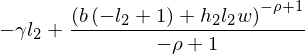

In [6]:
# Use sympy.subs to substitute consumption_2 into the utility function.
utility_subs = utility.subs(c_2,consumption2)
utility_subs

This is the final utility function, which we will define below.

In [7]:
# Define final utility function.
def utility_2(gamma, w, b, rho, h, l):
    return ((1-l)*b+(h*l*w))**(1-rho)/(1-rho)-gamma*l

Next we will try to solve the model visually.

In [8]:
# Import the following packages
%matplotlib inline
import matplotlib.pyplot as plt

Next we will use  np.argmax to solve the model for period 2 by using the given vector for $h_2$ and an empty vector (100,2), "choices2".

In [9]:
# Vectors
choices2 = np.empty((100,2))
h2_vec = np.linspace(0.1,1.5,100) 

# Parameters
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = 0.1

# loop over each value of h for l=0 and l=1 for the utility function to fill up choices2
for index, value in enumerate(h2_vec):
    choices2[index, 0] = utility_2(gamma, w, b, rho, value, 0)
    choices2[index, 1] = utility_2(gamma, w, b, rho, value, 1)

Now we can find the solutions for labor supply $l_2$, consumption $c_2$ and value $v_2$.

In [10]:
# Find the argument, which maximise the value of l2 given choices2
l2_sol = np.argmax(choices2, axis=1)
# Insert the above sol into consumption.
c2_sol = consumption_2(w, b ,l2_sol,h2_vec) 
# Max choises2 to find v2
v2_sol = np.max(choices2, axis=1)

At last we can show the solution in the below subplots.

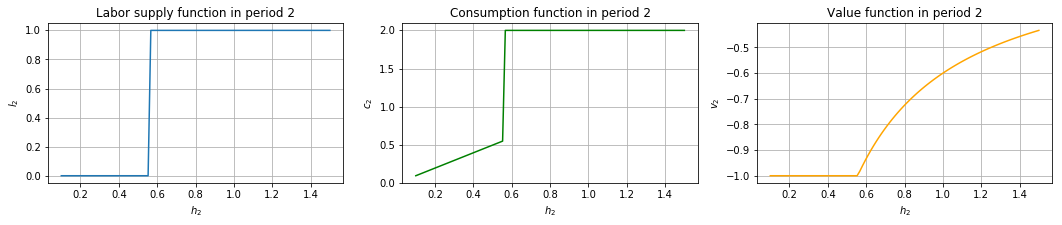

In [11]:
# Begin plot
fig = plt.figure(figsize=(18,10))

# Add the three subplots
ax = fig.add_subplot(3,3,1)
ax.plot(h2_vec,l2_sol)
ax.grid()
ax.set_xlabel('$h_2$')
ax.set_ylabel('$l_2$')
ax.set_title('Labor supply function in period 2');

ax = fig.add_subplot(3,3,2)
ax.plot(h2_vec,c2_sol, color='green')
ax.grid()
ax.set_xlabel('$h_2$')
ax.set_ylabel('$c_2$')
ax.set_title('Consumption function in period 2');

ax = fig.add_subplot(3,3,3)
ax.plot(h2_vec,v2_sol, color='orange')
ax.grid()
ax.set_xlabel('$h_2$')
ax.set_ylabel('$v_2$')
ax.set_title('Value function in period 2');

We see how there is a kink at a certain value of $h_2$, approx. 0.55. At this value, the worker gets more utility from working than living of unemployment benefits. Hence, the worker's consumtion and value increases.

# Question 2
Now the worker has a chance of accumulating human capital.

In [12]:
# Define consumption and utility function (same as period 2)
def consumption_1(w, h_1, l_1, b):
    return (w*h_1*l_1)+(1-l_1)*b

def utility_1(gamma, w, b, rho, h_1, l_1):
    return ((1-l_1)*b+(h_1*l_1*w))**(1-rho)/(1-rho)-gamma*l_1

Next we will create a value function, which inputs consits of the possibilities for the worker to accumulate human capital

In [13]:
def v1(gamma, b, w, rho, Delta, beta, h_1, l_1, v2_interp):
    #  h2 value, if no acc
    h2_no_acc = h_1 + l_1
    
    # b2 value, if no acc
    v2_no_acc = v2_interp([h2_no_acc])[0]
    
    # h2 value, if acc
    h2_acc = h_1 + l_1 + Delta
    
    # v2 value if acc
    v2_acc = v2_interp([h2_acc])[0]
    
    # expected v2 value
    v2 = 0.5 * v2_no_acc + 0.5 * v2_acc
    
    # return the total value
    return utility_1(gamma, rho, b, w, h_1, l_1) + beta * v2

Construct interpolar

In [14]:
from scipy import interpolate

# Constructing interpolar
v2_interp = interpolate.RegularGridInterpolator([h2_vec], v2_sol,
                                                bounds_error=False,fill_value=None)

Similar to how we did in Question 1, we create a empty array and loop over each value of $h$ 

In [15]:
# Vectors
choices1 = np.empty((100,2))


# loop over each value of h for l=0 and l=1 to fill up choices 1
for index, value in enumerate(h2_vec):
    choices1[index, 0] = v1(gamma, b, w, rho, Delta, beta, value, 0, v2_interp)
    choices1[index, 1] = v1(gamma, b, w, rho, Delta, beta, value, 1, v2_interp)


Now we can find the following solutions.

In [16]:
# Find the argument, which maximise the value of l1 given choices1
l1_sol = np.argmax(choices1, axis=1)

# Insert the above sol into consumption.
c1_sol = consumption_1(w,b,l1_sol,h2_vec)

# Max choises1 to find v1
v1_sol = np.max(choices1, axis=1)

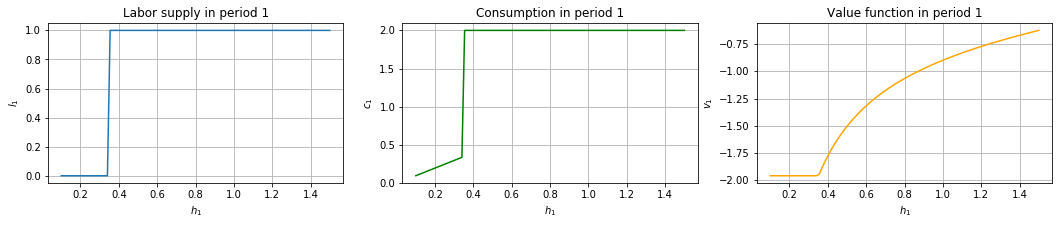

In [17]:
# Begin plotting
fig = plt.figure(figsize=(18,10))

# Add subplots
ax = fig.add_subplot(3,3,1)
ax.plot(h2_vec,l1_sol)
ax.grid()
ax.set_xlabel('$h_1$')
ax.set_ylabel('$l_1$')
ax.set_title('Labor supply in period 1');

ax = fig.add_subplot(3,3,2)
ax.plot(h2_vec,c1_sol, color ='green')
ax.grid()
ax.set_xlabel('$h_1$')
ax.set_ylabel('$c_1$')
ax.set_title('Consumption in period 1');

ax = fig.add_subplot(3,3,3)
ax.plot(h2_vec,v1_sol, color = 'orange')
ax.grid()
ax.set_xlabel('$h_1$')
ax.set_ylabel('$v_1$')
ax.set_title('Value function in period 1');

We see that when the worker has a chance of accumulating human capital, the kink happens at a smaller $h$ value, approx. 0.35.

# Question 3
In this question we will explore if the worker will still prefer working even though $b>w$. In order for us to do so, we will research if the worker chooses $l_t$ = [1] for a certain value of $h_t$. For your convenience this will be done only for period 2.

The method is similar to the previous questions.

In [21]:
# Import packages
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive

# Define interactive figure
def interactive_fig_w(w_t):
    
    # Find solution with the method similar to previous questions.
    choices_w = np.empty((100,2))
    
    for index, value in enumerate(h2_vec):
        choices_w[index, 0] = utility_2(gamma, w_t, b, rho, value, 0)
        choices_w[index, 1] = utility_2(gamma, w_t, b, rho, value, 1)
        
    lw_sol = np.argmax(choices_w, axis=1)
    
    # Plot figure
    
    plt.plot(h2_vec,lw_sol)
    plt.title('Labor supply in period 2')
    plt.xlabel('$h_2$')
    plt.ylabel('$l_2$')
    plt.axis([0,1.6,-0.1,1.1])
    plt.show()


interactive_plot_w = interactive(interactive_fig_w, 
                               w_t=widgets.FloatSlider(description="$w$", 
                                                       min=0.0,
                                                       max=1.0,
                                                       step=0.01,
                                                       value=0.9,
                                                       continuous_update=True) 
                              )

interactive_plot_w

interactive(children=(FloatSlider(value=0.9, description='$w$', max=1.0, step=0.01), Output()), _dom_classes=(…

What the above figure tells us is that when the wage is $w = 0.75$ or above, the worker gets more utility from working than relying on unemployment benefits $b = 1$. So yes, the worker will still work ($l_1 = 1$), when the worker's wage is below the unemployment benefits. 

# 2. AS-AD model

In [23]:
# Create dictionary for parameters and their values
par = {}

par['alpha'] = 5.76
par['h'] = 0.5
par['b'] = 0.5
par['phi'] = 0
par['gamma'] = 0.075

# Question 1
First we will define the following variables and parameters as symbols.

In [24]:
# Defining variables and parameters as symbols
alpha = sm.symbols("alpha")
b = sm.symbols("b")
h = sm.symbols("h")
phi = sm.symbols("phi")
gamma = sm.symbols("gamma")

y_t = sm.symbols("y_t")
y_t_1 = sm.symbols("y_{t-1}")
s_t = sm.symbols("s_t")
s_t_1 = sm.symbols("s_{t-1}")
v_t = sm.symbols("v_t")
pi_t = sm.symbols("pi_t")
pi_t_1 = sm.symbols("\pi_{t-1}")

Then we are able to construct the following equations for the SRAS curve and the AD curve.

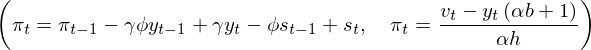

In [25]:
# Constructing SRAS and AD curve
SRAS = sm.Eq(pi_t,pi_t_1 + gamma * y_t  - phi * gamma * y_t_1 + s_t - phi * s_t_1)
AD = sm.Eq(pi_t, 1/(h * alpha) * (v_t - (1 + b * alpha) * y_t))
SRAS, AD

To solve the model, we will have to set the two curves equal to eachother.

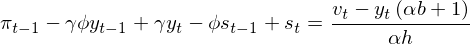

In [26]:
SRAS_AD = sm.Eq(
                pi_t_1 + gamma * y_t  - phi * gamma * y_t_1 + s_t - phi * s_t_1, 
                1/(h * alpha) * (v_t - (1 + b * alpha) * y_t))
SRAS_AD

Then we can solve for $y_t$

The solution for output y_t is:


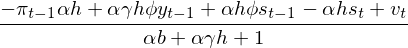

In [27]:
# Solve the equation for y_t
yt_sol = sm.solve(SRAS_AD,y_t)[0]
print(f'The solution for output y_t is:')
yt_sol

Then insert the above solution into the AD-curve to find $\pi_t$

The solution for inflaton pi_t is:


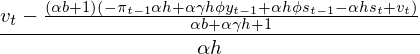

In [29]:
# Sub yt_sol into the AD equation.
pit_sol = 1/(h * alpha) * (v_t - (1 + b * alpha) * yt_sol)
print(f'The solution for inflaton pi_t is:')
pit_sol

To find the equilibrium values for  output, $y_t$, and inflation, $\pi_t$,given the parameters ($\alpha$, $h$, $b$, $\alpha$, $\gamma$) and $y_{t-1}$ , $\pi_{t-1}$, $v_t$, $s_t$, and $s_{t-1}$, we will substitute the given parameters into the solution.

In [30]:
yt_val = yt_sol.subs({alpha: par['alpha'],
                      h: par['h'],
                      b: par['b'],
                      phi: par['phi'],
                      gamma: par['gamma']})
print(f'The equilibrium for output y_t given the above parameters is:')
yt_val

The equilibrium for output y_t given the above parameters is:


In [31]:
pit_val = pit_sol.subs({alpha: par['alpha'],
                      h: par['h'],
                      b: par['b'],
                      phi: par['phi'],
                      gamma: par['gamma']})
print(f'The equilibrium for inflation pi_t given the above parameters is:')
pit_val

The equilibrium for inflation pi_t given the above parameters is:


# Question 2
We will first the initial values of $y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$. Next we will transform the sympy equations to lambda functions to calculate numerical values for $y_t$ and $\pi_t$

In [32]:
# Create dict for var and set initials value to 0

var = {}

var['pi_t_1_val'] = 0
var['v_t_val'] = 0
var['y_t_1_val'] = 0
var['s_t_val'] = 0
var['s_t_1_val'] = 0

# Transform the sympy equations into lambda functions

_yt_sol_func = sm.lambdify((alpha, h, b, phi, gamma, pi_t_1, v_t, y_t_1, s_t, s_t_1),yt_sol)

def yt_sol_func(pi_t_1, v_t, y_t_1, s_t, s_t_1,
                    alpha = par['alpha'],
                    h = par['h'],
                    b= par['b'],
                    phi= par['phi'],
                    gamma= par['gamma']):

    return _yt_sol_func(alpha, h, b, phi, gamma, pi_t_1, v_t, y_t_1, s_t, s_t_1)


# Calculate the numerical values
yt_sol_val = yt_sol_func(
                         pi_t_1 = var['pi_t_1_val'], 
                         v_t = var['v_t_val'], 
                         y_t_1 = var['y_t_1_val'], 
                         s_t = var['s_t_val'], 
                         s_t_1 = var['s_t_1_val']
                        )

f"The initial equilibrium value of y_t given the parameters and variables is  {yt_sol_val:.3f}"

'The initial equilibrium value of y_t given the parameters and variables is  0.000'

In [33]:
# Transform the sympy equations into lambda functions
_pi_sol_func = sm.lambdify((alpha, h, b, phi, gamma, pi_t_1, v_t, y_t_1, s_t, s_t_1, y_t),pit2_sol)

def pi_sol_func(pi_t_1, v_t, y_t_1, s_t, s_t_1, y_t,
                    alpha = par['alpha'],
                    h = par['h'],
                    b= par['b'],
                    phi= par['phi'],
                    gamma= par['gamma']):

    return _pi_sol_func(alpha, h, b, phi, gamma, pi_t_1, v_t, y_t_1, s_t, s_t_1, y_t)

pi_sol_val = pi_sol_func(
                         pi_t_1 = var['pi_t_1_val'], 
                         v_t = var['v_t_val'], 
                         y_t_1 = var['y_t_1_val'], 
                         s_t = var['s_t_val'], 
                         s_t_1 = var['s_t_1_val'],
                         y_t = yt_sol_val)
f"The initial equilibrium value of pi_t given the parameters and variables is  {pi_sol_val:.3f}"

'The initial equilibrium value of pi_t given the parameters and variables is  0.000'

Now we will try to illustrate the AD_curve and SRAS_curve in a AS-AD diagram. We will also create a slider to simulate the changing value of $v_t$

In [35]:
# First define the two curves as functions.
def AD_curve(alpha, h, b, v_t, y_t):
    return 1/(h * alpha) * (v_t - (1 + b * alpha) * y_t)

def SRAS_curve(gamma, phi, pi_t_1, y_t_1, s_t, s_t_1, y_t):
    return pi_t_1 + gamma * y_t  - phi * gamma * y_t_1 + s_t - phi * s_t_1

Creating the plot

In [49]:
# Define interactive figure
def interactive_fig(v_t_val):

    # Range for output, y_t
    y = np.linspace(-0.1, 0.1, 100)
    
    # Plot the optimal values for y_t and pi_t
    y_opt_val = yt_sol_func(
                         pi_t_1 = var['pi_t_1_val'], 
                         v_t = v_t_val, 
                         y_t_1 = var['y_t_1_val'], 
                         s_t = var['s_t_val'], 
                         s_t_1 = var['s_t_1_val'],
                        )
    
    pi_opt_val = pi_sol_func(
                         pi_t_1 = var['pi_t_1_val'], 
                         v_t = v_t_val, 
                         y_t_1 = var['y_t_1_val'], 
                         s_t = var['s_t_val'], 
                         s_t_1 = var['s_t_1_val'],
                         y_t = y
                        )

    # xlabel, ylabel and title
    plt.xlabel(r'$y_t$', )
    plt.ylabel(r'$\pi_{t}$', fontsize = 15)
    plt.title(r'Equilibrium for AD and SRAS', fontsize = 15)

    # Shorten
    AD_c = AD_curve(
                alpha = par["alpha"],
                h = par['h'],
                b = par['b'], 
                v_t = v_t_val,
                y_t = y
               )
    SRAS_c = SRAS_curve(
                gamma = par["gamma"],
                phi = par['phi'], 
                pi_t_1 = var['pi_t_1_val'], 
                y_t_1 = var['y_t_1_val'], 
                s_t = var['s_t_val'], 
                s_t_1 = var['s_t_1_val'], 
                y_t = y
                )
    # Plot the two curves
    plt.plot(y, AD_c, label = "AD-Curve")
    plt.plot(y, SRAS_c, label = "SRAS_Curve")

    # Create a dashed lines to show optimal values for y_t and pi_t
    plt.axvline(y_opt_val, 
                linestyle = 'dashed', 
                color = "red", 
                label = '$y^*$')
    
    plt.axhline(pi_opt_val, 
                linestyle = 'dashed', 
                color = "green", 
                label = '$\pi^*$')

    plt.legend()
    
    plt.axis([-0.15,0.15,-0.18,0.18])
    
    # Create arrow, which points at the equilibrium
    plt.annotate('Equilibrium', xy=(y_opt_val, pi_opt_val), xytext=(y_opt_val-0.10, pi_opt_val-0.05),
            arrowprops=dict(facecolor='black', shrink=0.01))

    plt.show()

# create slider and plot
interactive_plot = interactive(interactive_fig, 
                               v_t_val=widgets.FloatSlider(description="$v_t$", 
                                                       min=0.0,
                                                       max=0.1,
                                                       step=0.1,
                                                       value=0,
                                                       continuous_update=True) 
                              )

interactive_plot

interactive(children=(FloatSlider(value=0.0, description='$v_t$', max=0.1), Output()), _dom_classes=('widget-i…

We see how the $v_t$ shock moves the AD-curve up and how output increases.

# Question 3
For this question we will begin by setting the initial values to 0. Then create an array for the two shock variables and filling them up with the autoregressive parameters to simulate the economy.

In [45]:
par['delta'] = 0.80
par['omega'] = 0.15

In [46]:
# Initial values
y_1 = 0
pi_0 = 0
s_0 = 0
v_0 = 0
x_0 = 0.1
x_t = 0
c_t = 0

# Set periods to 100
period = 100

# Create array and fill in value for initial period
v_t = [ par["delta"] * v_0 + x_0 ]
s_t = [ par["omega"] * s_0 + c_t ]

# Fill up arrays for each period
for i in range(0, period):
    v_t.append(par['delta'] * v_t[i] + x_t)
    s_t.append(par['omega'] * s_t[i] + c_t)

Next we want to find all the numeric solutions for $y_t$ and $\pi_t$. We will create an empty array for $y_t$ and $\pi_t$ and then fill it up with the solutions from the simulation.

In [59]:
# Create arrays
y_vals = [0]
pi_vals = [0]

# Loop over each period  and append the solution to the array.
for i in range(1, period):
    
    # y
    y_vals_i = yt_sol_func(
        v_t=v_t[i],
        s_t=s_t[i],
        pi_t_1=pi_vals[i-1],
        y_t_1=y_vals[i-1],
        s_t_1=s_t[i-1]
        )
    y_vals.append(y_vals_i)
    # Pi
    pi_vals_i = pi_sol_func(
        v_t=v_t[i],
        s_t=s_t[i],
        y_t=y_vals[i],
        pi_t_1=pi_vals[i-1],
        y_t_1=y_vals[i-1],
        s_t_1=s_t[i-1]
        )
    pi_vals.append(pi_vals_i)

Now we will illustrate this shock to the economy. First we will define functions for the AD curve and the SRAS curve. For the first period, the function will take the initial input.

In [63]:
# Define functions, which returns the initial numeric solution for the first period and otherwise returns 
# the value for the simulated periods to come.
def AD_curves_func(y_t,period,
             h = par['h'],
             b = par['b'],
             alpha = par['alpha'],
             v_t = v_t): 
    if period == 0: 
        return 1 / (h * alpha) * (v_0 - (1 + b * alpha) * y_t)
    else:
        return 1 / (h * alpha) * (v_t[period - 1] - (1 + b * alpha) * y_t)
    
def SRAS_curves_func(y_t,period,
               gamma = par['gamma'],
               phi = par['phi'],
               s_t = s_t): 

    if period == 0: 
        return pi_0 + gamma * y_t - phi * y_1 + s_t[period] - phi * s_0
    else:
        y_values = [0]
        pi_values = [0]
        for i in range(1,period): 
            y_val_i = yt_sol_func(
            v_t=v_t[i],
            s_t=s_t[i],
            pi_t_1=pi_vals[i-1],
            y_t_1=y_vals[i-1],
            s_t_1=s_t[i-1]
        )
            y_values.append(y_val_i)
            pi_val_i = pi_sol_func(
            v_t = v_t[i],
            s_t = s_t[i],
            y_t = y_vals[i],
            pi_t_1 = pi_vals[i-1],
            y_t_1 = y_vals[i-1],
            s_t_1 = s_t[i-1])
            pi_values.append(pi_val_i)
            
        return pi_values[period-1] + gamma * y_t - phi * gamma * y_values[period - 1] + s_t[period] - phi * s_t[period-1] 
    

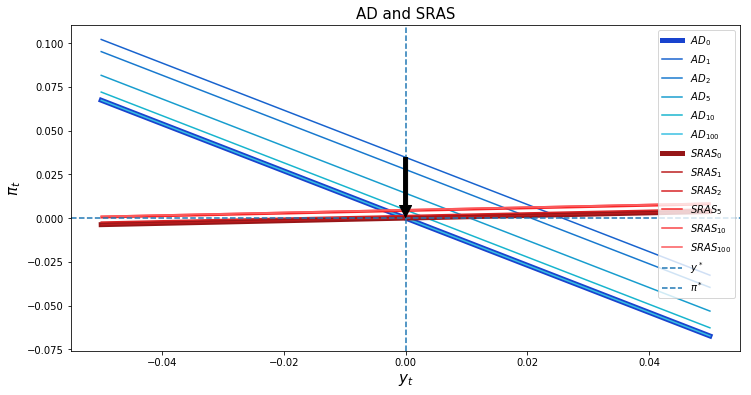

In [81]:
#  Constructing graph

def simulate_economy(vt,st): 
    
    # range for output, y
    
    y = np.linspace(-0.05,0.05,100)
    
    # Create AD-curves
    AD_0 = AD_curves_func(y, 0, v_t = v_t)
    AD_1 = AD_curves_func(y, 1, v_t = v_t)
    AD_2 = AD_curves_func(y, 2, v_t = v_t)
    AD_5 = AD_curves_func(y, 5, v_t = v_t)
    AD_10 = AD_curves_func(y, 10, v_t = v_t)
    AD_100 = AD_curves_func(y, 100, v_t = v_t)
    
    # Create SRAS-curves
    SRAS_0 = SRAS_curves_func(y, 0, s_t = s_t)
    SRAS_1 = SRAS_curves_func(y, 1, s_t = s_t)
    SRAS_2 = SRAS_curves_func(y, 2, s_t = s_t)
    SRAS_5 = SRAS_curves_func(y, 5, s_t = s_t)
    SRAS_10 = SRAS_curves_func(y, 10, s_t = s_t)
    SRAS_100 = SRAS_curves_func(y, 10 , s_t = s_t)
    
    
    # Plot the figure
    plt.figure(figsize=(12,6))
    
    # Plot AD curves
    plt.plot(y,AD_0,label=('$AD_0$'),linewidth=5,color='#1843ce')
    plt.plot(y,AD_1,label='$AD_1$',color='#1863ce')
    plt.plot(y,AD_2,label='$AD_2$',color='#1879ce')
    plt.plot(y,AD_5,label='$AD_5$',color='#189dce')
    plt.plot(y,AD_10,label='$AD_{10}$',color='#18b5ce')
    plt.plot(y,AD_100,label='$AD_{100}$',color='#38c0e2')
    
    # Plot SRAS curves
    plt.plot(y,SRAS_0,label='$SRAS_0$',linewidth=5,color='#961618')
    plt.plot(y,SRAS_1,label='$SRAS_1$',color='#ba1a1c')
    plt.plot(y,SRAS_2,label='$SRAS_2$',color='#d62022')
    plt.plot(y,SRAS_5,label='$SRAS_{5}$',color='#f92527')
    plt.plot(y,SRAS_10,label='$SRAS_{10}$',color='#f94345')
    plt.plot(y,SRAS_100,label='$SRAS_{100}$',color='#fc585a')
    
    # label, title 
    plt.title('AD and SRAS', fontsize = 15)
    plt.xlabel('$y_t$', fontsize = 15)
    plt.ylabel('$\pi_t$', fontsize = 15)

    # d. Create a dashed lines to show optimal values for y_t and pi_t 
    plt.axvline(yt_sol_val, linestyle='dashed', label='$y^*$')
    plt.axhline(pi_sol_val, linestyle='dashed', label='$\pi^*$')
    
    plt.legend()
    
    # Creates an arrow, which point at the way the AD-curve transition back to equilibrium.
    plt.annotate('', xy=(0, 0), xytext=(0.0, 0.035),
            arrowprops=dict(facecolor='black', shrink=0.01))
    
simulate_economy(v_t,s_t)

# Question 4
For this question we choose a random seed numer, 189, to generate $x_t$ and $c_t$. 

In [82]:
par['sigma_x'] = 3.492
par['sigma_c'] = 0.2

In [96]:
# Choose 1000 periods and set seed number to 189, then generate x_t and c_t 
period = 1000
seed = 189
np.random.seed(seed)
x_t = np.random.normal(0,par['sigma_x'],period)
c_t = np.random.normal(0,par['sigma_c'],period)

Next we will create an empty array for the two shock variables and fill them up as done previously.

In [97]:
# Create empty vectors
v_vec = [0]
s_vec = [0]


# Loop over each x_t and c_t
for i in range(1, period):
    v_i = par["delta"] * v_vec[i-1] + x_t[i]
    v_vec.append(v_i)
    s_i = par["omega"] * s_vec[i-1] + c_t[i]
    s_vec.append(s_i)

Next we want to find the new numeric solution to arrays for $y_t$ and $\pi_t$

In [98]:
# 
y_vec = [0]
pi_vec = [0]

# Loop over each period and find the numeric solutions.
for i in range(1, period): 
    
    y_val_i = yt_sol_func(
        v_t=v_vec[i],
        s_t=s_vec[i],
        pi_t_1=pi_vec[i-1],
        y_t_1=y_vec[i-1],
        s_t_1=s_vec[i-1]
        )
    
    y_vec.append(y_val_i)
    
    pi_val_i = pi_sol_func(
        pi_t_1=pi_vec[i-1],
        v_t=v_vec[i],
        y_t_1=y_vec[i-1],
        s_t=s_vec[i],
        s_t_1=s_vec[i-1],
        y_t=y_vec[i],
        )
    pi_vec.append(pi_val_i)

Now we can find the mean, variance, correlation etc.

In [45]:
# Variance for y
y_variance = np.var(y_vec)
f'1, The variance of y_t is: {y_variance:.3f}'

'1, The variance of y_t is: 1.993'

In [46]:
# Variance for pi
pi_variance = np.var(pi_vec)
f'2. The variance of pi_t is: {pi_variance:.3f}'

'2. The variance of pi_t is: 1.206'

In [47]:
# Correlation between y and pi
y_pi_corr = np.corrcoef(y_vec,pi_vec)
f'3. The correlation between y_t and pi_t is: {y_pi_corr[1,0]:.3f}'

'3. The correlation between y_t and pi_t is: -0.234'

In [48]:
# Auto-correlation between y_t_1 and y_t
autocoef_y = np.corrcoef(np.array([y_vec[:-1],y_vec[1:]]))
f'4. The auto-correlation between y_t and y_t_1 is: {autocoef_y[1,0]:.3f}'

'4. The auto-correlation between y_t and y_t_1 is: 0.791'

In [49]:
# Auto-correlation between pi_t_1 and pi_t
autocoef_pi = np.corrcoef(np.array([pi_vec[:-1],pi_vec[1:]]))
f'5. The auto-correlation between pi_t and pi_t_1 is: {autocoef_pi[1,0]:.3f}'

'5. The auto-correlation between pi_t and pi_t_1 is: 0.980'

# Question 5 
For this question, we will begin by resetting the variables by setting them equal to their initial values. Then we will define a function, which first create two empty arrays and then loop over each period to fill them up with the numeric solutions. The function will return the correlation coeffecient between $y_t$ and $\pi_t$

In [101]:
# Set variables to their initial values
s_0 = 0
v_0 = 0
x_0 = 0.1
x_t = 0
c_t = 0

# Define function
def corr_sim(corr):
    
    # Create arrays
    y_sim_vec = [0]
    pi_sim_vec = [0]
    
    
    # Loop over each period and find numerical solutions.
    for i in range (1, period):
        
        y_sim = yt_sol_func(
        v_t=v_vec[i],
        s_t=s_vec[i],
        pi_t_1=pi_sim_vec[i-1],
        y_t_1=y_sim_vec[i-1],
        s_t_1=s_vec[i-1],
        phi = corr
        )
        y_sim_vec.append(y_sim)
        
        
        pi_sim = pi_sol_func(
        pi_t_1=pi_sim_vec[i-1],
        v_t=v_vec[i],
        y_t_1=y_sim_vec[i-1],
        s_t=s_vec[i],
        s_t_1=s_vec[i-1],
        y_t=y_sim_vec[i],
        phi = corr
        )
        pi_sim_vec.append(pi_sim)
        
    # Return the correlation coeffecient
    return np.corrcoef(y_sim_vec,pi_sim_vec)[1,0]

Now we will plot how the correlation increases for increasing values of $\phi$.

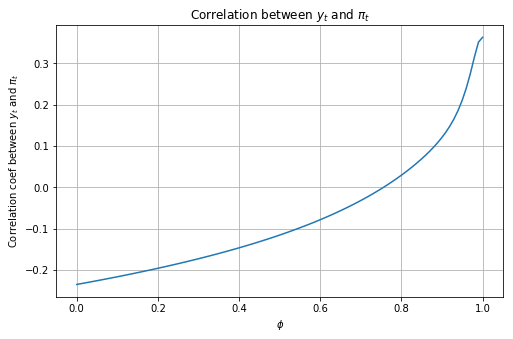

In [105]:
# Create vec for phi
phi_vec = np.linspace(0,1,100)

# Create empty vec for correlation and loop over each correlation between y_t and pi_t
correlation_vec = np.empty(100)
for i, val in enumerate(phi_vec):
    correlation_vec[i] = corr_sim(val)

# plot
plt.figure(figsize=(8,5))
plt.plot(phi_vec,correlation_vec)
plt.title('Correlation between $y_t$ and $\pi_t$')
plt.xlabel('$\phi$')
plt.ylabel('Correlation coef between $y_t$ and $\pi_t$')
plt.grid(True)

We see from the above plot how the correlation increases for increasing values of $\phi$
Now we will make use of scipy.optimize to find the value of $\phi$, which ensure that the correlation coef between $y_t$ and $pi_t$ is 0.31

In [106]:
# import optimize
from scipy import optimize
# Set x_0 = 0
x_0 = 0

# Create a lambda function
obj = lambda corr: (corr_sim(corr)-0.31)**2

# minimize_scalar with the bounded method
result = optimize.minimize_scalar(obj,x_0,method='bounded',bounds=[0.5,1])
print(f'"The optimal value of phi is {result.x:.3} to ensure the correlation coef between y_t and pi_t is 0.31')

"The optimal value of phi is 0.979 to ensure the correlation coef between y_t and pi_t is 0.31


# Quesiton 6
Unfortunately, we ran into some issues when trying to solve the last question. 
We tried to enforce the similar method as in the previous question, but was unable to do it correctly.
Anyways, we notice that the $var(y_t)$, $corr(y_t,\pi_t$) and $corr(y_{t-1},y_t)$ somewhat matches the US economy, while the others does not.

# 3. Exchange economy

In [561]:
# a. parameters
N = 50000
mu = np.array([3,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 0.8
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

# Question 1
As the utility function is presented as a Cobb-douglas, we know that $beta_j$ is the budget share for each good.

In [562]:
# Create arrays for each agent's preferences of the three goods
beta1=betas[:,0]
beta2=betas[:,1]
beta3=betas[:,2]

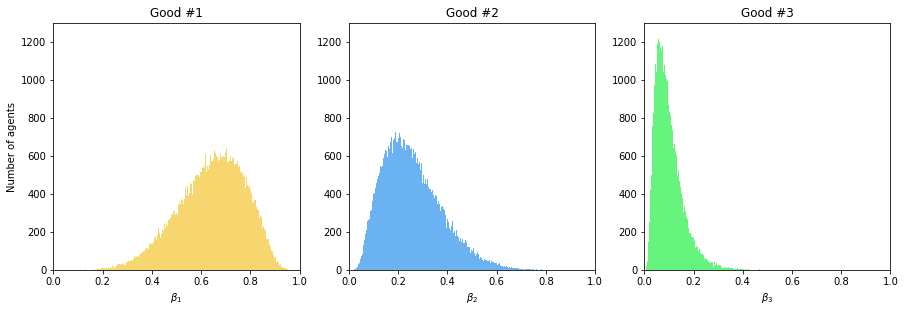

In [563]:
# Create figure
fig = plt.figure(figsize=(15,10))

# Add a subplot for each good
ax1 = fig.add_subplot(2,3,1)
ax1.hist(beta1, bins=200, color ="#f7d56f")
ax1.set_title('Good #1')
ax1.set_xlabel('$\\beta_1$')
ax1.set_ylabel('Number of agents')
plt.axis([0, 1, 0, 1300])
        
ax2 = fig.add_subplot(2,3,2)
ax2.hist(beta2, bins=200, color ="#6ab2f2")
ax2.set_title('Good #2')
ax2.set_xlabel('$\\beta_2$')
plt.axis([0, 1, 0, 1300])

ax3 = fig.add_subplot(2,3,3)
ax3.hist(beta3, bins=200, color ="#66f47e")
ax3.set_title('Good #3')
ax3.set_xlabel('$\\beta_3$')
plt.axis([0, 1, 0, 1300])


plt.show()    

# Question 2
We will begin by defining the demand function for each of the three goods. 

In [564]:
# The function takes the two price vectors p1, p2 and three endowments e1, e2, e3 and the betas.
# The income is defined as price times endowments
# The function returns the demand for each good 

def demand_good_1_func(p1,p2,e1,e2,e3,betas):
    I = p1*e1+p2*e2+e3
    return beta1*I/p1

def demand_good_2_func(p1,p2,e1,e2,e3,betas):
    I = p1 * e1 + p2 * e2 + e3
    return beta2*I/p2

def demand_good_3_func(p1,p2,e1,e2,e3,betas):
    I = p1 * e1 + p2 * e2 + e3
    return beta3*I

Then we will define the excess demand functions for each good.

In [565]:
def excess_demand_good_1_func(p1,p2,e1,e2,e3,betas):

    # a. demand - Sum of all demand for good 1
    demand = np.sum(demand_good_1_func(p1,p2,e1,e2,e3,betas))
    
    # b. supply - Sum of all endowments
    supply = np.sum(e1)
    
    # c. excess demand - Demand less the supply
    excess_demand = demand-supply
    
    return excess_demand

def excess_demand_good_2_func(p1,p2,e1,e2,e3,betas):
    
    # a. demand - Sum of all demand for good 2
    demand = np.sum(demand_good_2_func(p1,p2,e1,e2,e3,betas))
    
    # b. upply - Sum of all endowments
    supply = np.sum(e2)
    
    # c. excess demand - Demand less the supply
    excess_demand = demand-supply
    
    return excess_demand


def excess_demand_good_3_func(p1,p2,e1,e2,e3,betas):
    
    # a. demand - Sum of all demand for good 3
    demand = np.sum(demand_good_3_func(p1,p2,e1,e2,e3,betas))
    
    # b. Sum of all endowments
    supply = np.sum(e3)
    
    # c. excess demand - Demand less the supply
    excess_demand = demand-supply
    
    return excess_demand

Next we will first define the two price vectors for p1 and p2, which we define as a linear vector from [0.5,10]. Then we will make use of np.meshgrid to return grids from the price vectors.
We will then create three empty grids for each excess grid and then fill them up with each value in the price vectors given the demand excess functions.

In [566]:
# choose a size for the vectors
Num = 100


# Create shape tuple
shape_tuple = (Num,Num)

# Create price vectors
p1_vec = np.linspace(0.5,10,Num)
p2_vec = np.linspace(0.5,10,Num)


# Create meshgrid from price vectors
p1_grid, p2_grid = np.meshgrid(p1_vec, p2_vec) 


# Define three empty excess grids 
excess1 = np.empty((shape_tuple))
excess3 = np.empty((shape_tuple))
excess3 = np.empty((shape_tuple))


# Iterate over each value in the price vector to fill up the excess grids
for i, p1 in enumerate(p1_vec):
    for j, p2 in enumerate(p2_vec):
        excess1[i,j]=excess_demand_good_1_func(p1,p2,e1,e2,e3,betas)
        excess2[i,j]=excess_demand_good_2_func(p1,p2,e1,e2,e3,betas)
        excess3[i,j]=excess_demand_good_3_func(p1,p2,e1,e2,e3,betas)


In [567]:
# Import packages
%matplotlib inline
import matplotlib.pyplot as plt # baseline modul
from mpl_toolkits.mplot3d import Axes3D # for 3d figures
from matplotlib import cm # for color

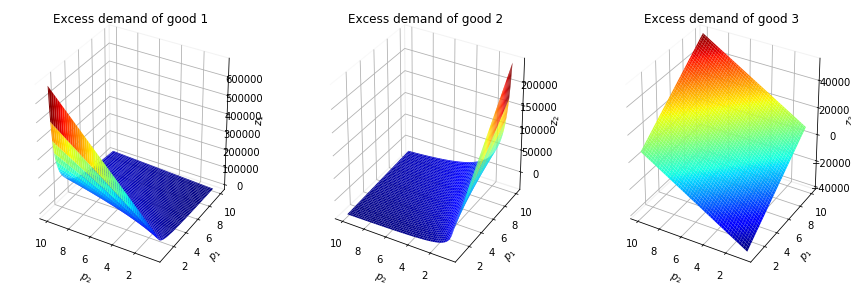

In [568]:

fig = plt.figure(figsize=(15,5)) # create the figure

# For each good, plot the price meshes and the excess demand. 

ax1 = fig.add_subplot(1,3,1,projection='3d') # create a 3d axis in the figure 
ax1.plot_surface(p1_grid,p2_grid,excess1,cmap=cm.jet) # create surface plot in the axis
ax1.invert_xaxis()
ax1.set_title('Excess demand of good 1')
ax1.set_xlabel('$p_2$')
ax1.set_ylabel('$p_1$')
ax1.set_zlabel('$z_1$') 
ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False

ax2 = fig.add_subplot(1,3,2,projection='3d') # create a 3d axis in the figure 
ax2.plot_surface(p1_grid,p2_grid,excess2,cmap=cm.jet)
ax2.invert_xaxis()
ax2.set_title('Excess demand of good 2')
ax2.set_xlabel('$p_2$')
ax2.set_ylabel('$p_1$')
ax2.set_zlabel('$z_2$'); 
ax2.xaxis.pane.fill = False
ax2.yaxis.pane.fill = False
ax2.zaxis.pane.fill = False

ax3 = fig.add_subplot(1,3,3,projection='3d') # create a 3d axis in the figure 
ax3.plot_surface(p1_grid,p2_grid,excess3,cmap=cm.jet)
ax3.invert_xaxis()
ax3.set_title('Excess demand of good 3')
ax3.set_xlabel('$p_2$')
ax3.set_ylabel('$p_1$')
ax3.set_zlabel('$z_3$')
ax3.xaxis.pane.fill = False
ax3.yaxis.pane.fill = False
ax3.zaxis.pane.fill = False;

# Question 3
We will begin this question by defining a function for the tâtonnement process, which takes p1, p2, e1, e2, e3, betas, kappa (Which adjust the aggresivivity), eps (the tolerance), maxiter (Max iterations).

In [569]:
def find_equilibrium(p1,p2,e1,e2,e3,betas,kappa=0.9,eps=1e-8,maxiter=3000):
    
    t = 0
    while True:

        # a. excess demand for good 1 and good 2
        Z1 = excess_demand_good_1_func(p1,p2,e1,e2,e3,betas)
        Z2 = excess_demand_good_2_func(p1,p2,e1,e2,e3,betas)
        
        # b: If the excess demand for good 1 or good 2 is lower (or maxiter has been reached) than the tolerance
        #  then break.
        if  np.abs(Z1) < eps and np.abs(Z2) < eps or t >= maxiter:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f} p2 = {p2:12.8f} -> excess demand -> {Z2:14.8f}')
            break    
    
        # c. If not, then set the prices as below
        p1 = p1 + kappa*Z1/betas.size
        p2 = p2 + kappa*Z2/betas.size
        
        # d. return 
        if t < 5 or t%25 == 0:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f} p2 = {p2:12.8f} -> excess demand -> {Z2:14.8f}')
        elif t == 5:
            print('   ...')
            
        t += 1    

    return p1, p2

Now we guess on the prices and run the function.

In [570]:
p1 = 3
p2 = 3
kappa = 0.8
eps = 1e-8
p1, p2 = find_equilibrium(p1,p2,e1,e2,e3,betas,kappa=kappa,eps=eps)

  0: p1 =   3.13242998 -> excess demand -> 24830.62081187 p2 =   2.89503410 -> excess demand -> -19681.10609181
  1: p1 =   3.24953265 -> excess demand -> 21956.75110613 p2 =   2.79653311 -> excess demand -> -18468.93528892
  2: p1 =   3.35382488 -> excess demand -> 19554.79244949 p2 =   2.70436429 -> excess demand -> -17281.65490885
  3: p1 =   3.44723557 -> excess demand -> 17514.50532486 p2 =   2.61840426 -> excess demand -> -16117.50536588
  4: p1 =   3.53129068 -> excess demand -> 15760.33324137 p2 =   2.53852765 -> excess demand -> -14976.86431327
   ...
 25: p1 =   4.32935739 -> excess demand ->  3668.14907331 p2 =   1.88994781 -> excess demand ->  -737.37747432
 50: p1 =   4.69763396 -> excess demand ->  2299.14161154 p2 =   1.95010213 -> excess demand ->   778.99889458
 75: p1 =   4.96884180 -> excess demand ->  1824.74465940 p2 =   2.04851523 -> excess demand ->   679.27508163
100: p1 =   5.18816891 -> excess demand ->  1494.51036578 p2 =   2.13043481 -> excess demand ->   55

The Walras-equilibrium prices, $(p_1,p_2)$, where both excess demands are (approximately) zero have been found to be: 

In [571]:
f'(p_1,p_2) = ({p1:.3f},{p2:.3f})'

'(p_1,p_2) = (6.490,2.617)'

At last we will ensure that the excess demand is almost zero.

In [572]:
Z1 = excess_demand_good_1_func(p1,p2,e1,e2,e3,betas)
Z2 = excess_demand_good_2_func(p1,p2,e1,e2,e3,betas)
Z3 = excess_demand_good_3_func(p1,p2,e1,e2,e3,betas)
f'Z1: {Z1:.2f}, Z2: {Z2:.2f}, Z3: {Z3:.2f}'

'Z1: 0.00, Z2: 0.00, Z3: -0.01'

# Question 4
We define the utility function as presented in the text. 

In [573]:
# The function takes the two prices, p1, p2 and the endowments, e1, e2, e3, betas and gamma.
# The income with the new prices
# The demand for each good given the new prices
# return the utility

def utility_func(p1, p2, e1, e2, e3, betas, gamma):
    
    I = p1 * e1 + p2 * e2 + e3
    x1 = beta1*I/p1
    x2 = beta2*I/p2
    x3 = beta3*I
    
    
    return (x1 ** beta1 * x2 ** beta2 * x3 ** beta3)**gamma

Next we calculate the mean and variance for the utility of the agents

In [574]:
utility_vec = utility_func(p1, p2, e1, e2, e3, betas, gamma)

# Calculate mean
utility_mean = np.mean(utility_vec)

# Calculate variance
utility_var = np.var(utility_vec)

f'The distribution has the mean of {utility_mean:.3f} and the variance of {utility_var:.3f}'


'The distribution has the mean of 1.010 and the variance of 0.317'

Now we will plot the distribution of utility in a histogram

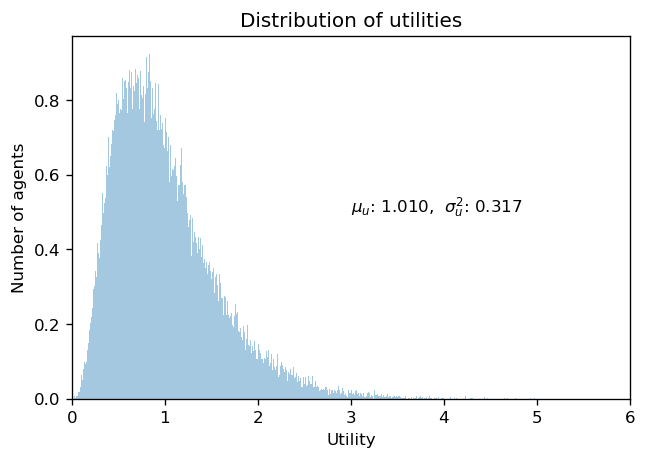

In [575]:
# Plotting the figure
fig = plt.figure(dpi=120)

ax = fig.add_subplot(1,1,1)
ax.hist(utility_vec,bins=500,density=True, alpha = 0.4, label='beta1')
ax.set_title('Distribution of utilities')
ax.set_xlabel('Utility')
ax.set_ylabel('Number of agents')
ax.set_xlim([0,6])
ax.text(3, 0.5, f'$\mu_u$: {utility_mean:.3f},  $\sigma^2_u$: {utility_var:.3f}');

# Question 5
We start this question by creating a new empty array for each good and then filling it up with the mean value of each endowment.

In [576]:
# Create empty array and fill up with mean value of endowment
e1_equal = np.zeros(N)+np.mean(e1)
e2_equal = np.zeros(N)+np.mean(e2)
e3_equal = np.zeros(N)+np.mean(e3)

Then we can run our find_equilibrium function one more time with the endowment arrays.

In [577]:
# Guess on prices
p1 = 3
p2 = 3

# Run function
p1, p2 = find_equilibrium(p1,p2,e1_equal,e2_equal,e3_equal,betas,kappa=kappa,eps=eps)

  0: p1 =   3.13240299 -> excess demand -> 24825.55975897 p2 =   2.89504860 -> excess demand -> -19678.38813939
  1: p1 =   3.24947755 -> excess demand -> 21951.48082735 p2 =   2.79656676 -> excess demand -> -18465.34392437
  2: p1 =   3.35374115 -> excess demand -> 19549.42451647 p2 =   2.70442119 -> excess demand -> -17277.29411287
  3: p1 =   3.44712313 -> excess demand -> 17509.12132286 p2 =   2.61848798 -> excess demand -> -16112.47732727
  4: p1 =   3.53114976 -> excess demand -> 15754.99444829 p2 =   2.53864120 -> excess demand -> -14971.27125771
   ...
 25: p1 =   4.32881196 -> excess demand ->  3665.82708308 p2 =   1.89065163 -> excess demand ->  -734.78080912
 50: p1 =   4.69682912 -> excess demand ->  2297.33952155 p2 =   1.95095356 -> excess demand ->   779.53750330
 75: p1 =   4.96780468 -> excess demand ->  1823.05317155 p2 =   2.04941887 -> excess demand ->   679.57023695
100: p1 =   5.18691322 -> excess demand ->  1492.91876997 p2 =   2.13136828 -> excess demand ->   55

The Walras-equilibrium prices, $(p_1,p_2)$, where both excess demands are (approximately) zero have been found to be: 

In [580]:
f'(p_1,p_2) = ({p1:.3f},{p2:.3f})'

'(p_1,p_2) = (6.486,2.617)'

We see that there is a small change in p1, but beside that th equilibrium prices are almost identical.

At last we will create an interactive figure for changing values of gamma, which will show how the two distributions behave and how their mean and variance are affected.

In [583]:
def utility_fig(gamma):
    
    # Define old utility vector and calculate mean and variance
    utility_vec = utility_func(p1, p2, e1, e2, e3, betas, gamma)
    utility_mean = np.mean(utility_vec)
    utility_var = np.var(utility_vec)
    
     # Define new utility vector and calculate mean and variance
    utility_vec_equal= utility_func(p1, p2, e1_equal, e1_equal, e1_equal, betas, gamma)
    utility_mean_equal = np.mean(utility_vec_equal)
    utility_var_equal = np.var(utility_vec_equal)
    
    # Plot the figures
    fig = plt.figure(figsize=(15,10))
   
    ax1 = fig.add_subplot(2,2,1)
    ax1.hist(utility_vec, bins=500, color ="#6ab2f2")
    ax1.set_title('Distribution of utilities')
    ax1.set_xlabel('Utility')
    ax1.set_ylabel('Number of agents')
    plt.axis([-0.1, 5, 0, 1600])
        
    ax2 = fig.add_subplot(2,2,2)
    ax2.hist(utility_vec_equal, bins=500, color ="#f7d56f")
    ax2.set_title('Distribution of utilities with equal endowments')
    ax2.set_xlabel('Utility')
    ax2.set_ylabel('Number of agents')

    # Plot text with mean and variance
    plt.text(-4, 900, f'$\mu$: {utility_mean:.3f} $\sigma^2$: {utility_var:.3f}')
    plt.text(2.0, 900, f'$\mu$: {utility_mean_equal:.3f} $\sigma^2$: {utility_var_equal:.3f}')
    plt.axis([-0.1, 5, 0, 1600])
    
    plt.show()
# Create slider
interactive_plot = interactive(utility_fig, 
                               gamma=widgets.FloatSlider(description="$\gamma$", 
                                                       min=0.0,
                                                       max=2.0,
                                                       step=0.1,
                                                       value=0.8,
                                                       continuous_update=True) 
                              )

interactive_plot

interactive(children=(FloatSlider(value=0.8, description='$\\gamma$', max=2.0), Output()), _dom_classes=('widg…

First of all we notice how concentrated around the mean the utitilty is for the second plot, due to the variance being much smaller. We also notice how the utility is never below 1. When we increase the value of gamma, we notice how the variance of the first plot increases by a much higher ratio than the second plot. Having the same equal endowments means the change in utility is only due to small changes in preferences.